In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
url_training=pd.read_csv('url_dataset.csv')

In [3]:
url_training.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [4]:
url_training.tail()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
1776,M4_48,194,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,2,124,0,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,...,2,6,6631,87,89,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1/04/1998 0:00,9/12/2016 0:00,...,0,0,0,0,0,0,0,0,0.0,0
1780,B0_676,249,40,utf-8,Microsoft-IIS/8.5,24435.0,US,Wisconsin,14/11/2008 0:00,20/11/2013 0:00,...,6,11,2314,25,28,3039,2776,25,6.0,0


In [5]:
url_training.describe()


,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,969.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,11726.927761,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,36391.809051,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,11323.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


In [6]:
print(url_training.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

0    1565
1     216
Name: Type, dtype: int64

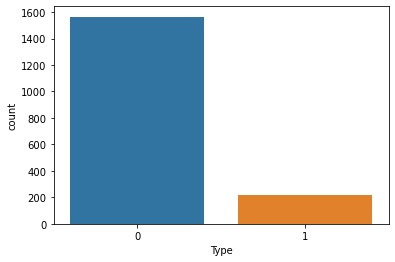

In [7]:
sns.countplot(x='Type', data=url_training)
url_training.Type.value_counts()

In [8]:
url_training.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [9]:
url_data = url_training.drop(['URL','WHOIS_UPDATED_DATE','WHOIS_REGDATE'], axis=1)
url_data.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,iso-8859-1,nginx,263.0,None,None,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,ISO-8859-1,nginx,162.0,US,AK,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,UTF-8,None,124140.0,US,TX,57,2,5,4278,61,62,129889,4586,61,4.0,0


<AxesSubplot:xlabel='REMOTE_IPS', ylabel='CONTENT_LENGTH'>

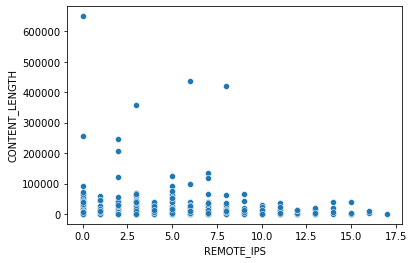

In [10]:
sns.scatterplot(x='REMOTE_IPS', y='CONTENT_LENGTH', data=url_data)

In [11]:
REMOTE_IPS_gp = url_data.groupby(url_data['REMOTE_IPS'])
REMOTE_IPS_gp.mean()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
REMOTE_IPS,,,,,,,,,,,,,
0,59.809741,11.470320,12055.633028,0.000000,0.000000,0.000000,0.006088,0.246575,15.328767,0.444444,0.006088,0.006088,0.097412
1,59.000000,11.801980,7634.978723,13.574257,3.445545,1397.009901,15.415842,17.148515,16754.871287,1537.089109,15.415842,1.841584,0.306931
2,52.178010,10.434555,11223.396552,15.287958,4.554974,1902.801047,17.994764,19.219895,15496.010471,2109.104712,17.994764,2.705263,0.225131
3,54.726776,10.699454,12473.540541,25.918033,11.196721,15220.306011,29.256831,31.765027,27664.092896,15473.934426,29.256831,3.322404,0.081967
4,55.421875,10.757812,6212.402778,20.406250,6.882812,2229.015625,24.078125,24.398438,18165.093750,2508.046875,24.078125,3.640625,0.125000
5,51.119403,10.582090,12303.141176,26.582090,7.283582,2899.880597,31.343284,30.156716,24443.246269,3261.888060,31.343284,4.738806,0.201493
6,61.536082,12.175258,16663.851852,29.195876,10.020619,2924.835052,33.237113,32.731959,27624.515464,3234.381443,33.237113,4.041237,0.082474
7,57.737500,11.000000,13244.000000,28.025000,11.162500,2860.937500,31.862500,30.050000,25881.425000,3156.812500,31.862500,3.825000,0.050000
8,56.044776,11.074627,20711.727273,45.313433,8.358209,4220.567164,49.432836,48.208955,47988.820896,4520.597015,49.432836,3.910448,0.074627


In [12]:
def CONTENT_LENGTH_approx(cols):
    CONTENT_LENGTH = cols[0]
    REMOTE_IPS = cols[1]
    
    if pd.isnull(CONTENT_LENGTH):
        if REMOTE_IPS == 0:
            return 12055.6
        elif REMOTE_IPS == 1:
            return 7634.9
        elif REMOTE_IPS == 2:
            return 11223.3
        elif REMOTE_IPS == 3:
            return 12473.5
        elif REMOTE_IPS == 4:
            return 6212.4
        elif REMOTE_IPS == 5:
            return 12303.1
        elif REMOTE_IPS == 6:
            return 16663.8
        elif REMOTE_IPS == 7:
            return 13244.0
        elif REMOTE_IPS == 8:
            return 20711.7
        elif REMOTE_IPS == 9:
            return 9515.0
        elif REMOTE_IPS == 10:
            return 6828.2
        elif REMOTE_IPS == 11:
            return 9210.8
        elif REMOTE_IPS == 12:
            return 6828.2
        elif REMOTE_IPS == 13:
            return 7315.4
        elif REMOTE_IPS == 14:
            return 16279.5
        elif REMOTE_IPS == 15:
            return 9575.4
        elif REMOTE_IPS == 16:
            return 7256.0
        else:
            return 324.0
        
    else:
        return CONTENT_LENGTH

In [13]:
url_data['CONTENT_LENGTH']= url_data[['CONTENT_LENGTH', 'REMOTE_IPS']].apply(CONTENT_LENGTH_approx, axis=1)

In [14]:
url_data.isnull().sum()

URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       1
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              1
Type                         0
dtype: int64

In [15]:
url_data.dropna(inplace=True)
url_data.reset_index(inplace=True, drop=True)

print(url_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1779 entries, 0 to 1778
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL_LENGTH                 1779 non-null   int64  
 1   NUMBER_SPECIAL_CHARACTERS  1779 non-null   int64  
 2   CHARSET                    1779 non-null   object 
 3   SERVER                     1779 non-null   object 
 4   CONTENT_LENGTH             1779 non-null   float64
 5   WHOIS_COUNTRY              1779 non-null   object 
 6   WHOIS_STATEPRO             1779 non-null   object 
 7   TCP_CONVERSATION_EXCHANGE  1779 non-null   int64  
 8   DIST_REMOTE_TCP_PORT       1779 non-null   int64  
 9   REMOTE_IPS                 1779 non-null   int64  
 10  APP_BYTES                  1779 non-null   int64  
 11  SOURCE_APP_PACKETS         1779 non-null   int64  
 12  REMOTE_APP_PACKETS         1779 non-null   int64  
 13  SOURCE_APP_BYTES           1779 non-null   int64

In [16]:
url_data.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,iso-8859-1,nginx,263.0,None,None,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,ISO-8859-1,nginx,162.0,US,AK,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,UTF-8,None,124140.0,US,TX,57,2,5,4278,61,62,129889,4586,61,4.0,0


In [17]:
Type=url_data.groupby('Type').size()
Type

Type
0    1563
1     216
dtype: int64

In [18]:
def malicious(Type):
    if Type==0:
        return 'Non-Malicious'
    elif Type==1:
        return 'Malicious'

In [19]:
url_data['Malicious']=url_data['Type'].apply(malicious)
url_data.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,Malicious
0,16,7,iso-8859-1,nginx,263.0,None,None,7,0,2,700,9,10,1153,832,9,2.0,1,Malicious
1,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,17,7,4,1230,17,19,1265,1230,17,0.0,0,Non-Malicious
2,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,0,0,0,0,0,0,0,0,0,0.0,0,Non-Malicious
3,17,6,ISO-8859-1,nginx,162.0,US,AK,31,22,3,3812,39,37,18784,4380,39,8.0,0,Non-Malicious
4,17,6,UTF-8,None,124140.0,US,TX,57,2,5,4278,61,62,129889,4586,61,4.0,0,Non-Malicious


In [20]:
url_data['CHARSET']=url_data['CHARSET'].str.upper()

In [21]:
url_data['WHOIS_COUNTRY']= (url_data['WHOIS_COUNTRY'].str.upper())


In [22]:
x='CYPRUS'
Y='CY'
a='UNITED KINGDOM'
b='UK'
c="[U'GB'; U'UK']"
d='UK'
url_data['WHOIS_COUNTRY']=url_data['WHOIS_COUNTRY'].replace(x,Y).replace(a,b).replace(c,d)
print(url_data['WHOIS_COUNTRY'].unique())

['NONE' 'US' 'SC' 'GB' 'UK' 'RU' 'AU' 'CA' 'PA' 'SE' 'IN' 'LU' 'TH' 'FR'
 'NL' 'UG' 'JP' 'CN' 'SI' 'IL' 'KY' 'AT' 'CZ' 'PH' 'BE' 'NO' 'TR' 'LV'
 'DE' 'ES' 'BR' 'KR' 'HK' 'UA' 'CH' 'BS' 'PK' 'IT' 'CY' 'BY' 'AE' 'IE'
 'UY' 'KG']


In [23]:
url_data.drop('WHOIS_STATEPRO', axis =1)

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,Malicious
0,16,7,ISO-8859-1,nginx,263.0,NONE,7,0,2,700,9,10,1153,832,9,2.0,1,Malicious
1,16,6,UTF-8,Apache/2.4.10,15087.0,NONE,17,7,4,1230,17,19,1265,1230,17,0.0,0,Non-Malicious
2,16,6,US-ASCII,Microsoft-HTTPAPI/2.0,324.0,NONE,0,0,0,0,0,0,0,0,0,0.0,0,Non-Malicious
3,17,6,ISO-8859-1,nginx,162.0,US,31,22,3,3812,39,37,18784,4380,39,8.0,0,Non-Malicious
4,17,6,UTF-8,None,124140.0,US,57,2,5,4278,61,62,129889,4586,61,4.0,0,Non-Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774,194,16,UTF-8,Apache,12055.6,ES,0,0,0,0,0,3,186,0,0,0.0,1,Malicious
1775,198,17,UTF-8,Apache,12055.6,ES,0,0,0,0,0,2,124,0,0,0.0,1,Malicious
1776,201,34,UTF-8,Apache/2.2.16 (Debian),8904.0,US,83,2,6,6631,87,89,132181,6945,87,4.0,0,Non-Malicious
1777,234,34,ISO-8859-1,cloudflare-nginx,12055.6,US,0,0,0,0,0,0,0,0,0,0.0,0,Non-Malicious


In [24]:
url_data['SERVER'].value_counts()

Apache                                                  385
nginx                                                   211
None                                                    175
Microsoft-HTTPAPI/2.0                                   113
cloudflare-nginx                                         94
                                                       ... 
marrakesh 1.12.2                                          1
CherryPy/3.6.0                                            1
Yippee-Ki-Yay                                             1
Apache/2.4.6 (CentOS) OpenSSL/1.0.1e-fips PHP/7.0.14      1
mw2197.codfw.wmnet                                        1
Name: SERVER, Length: 239, dtype: int64

In [25]:
url_data['SERVER'].fillna(url_data['SERVER'].value_counts().index[0],inplace=True)

In [26]:
url_data['SERVER'].isnull().sum()

0

In [27]:
url_data.isnull().sum()

URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
Malicious                    0
dtype: int64

In [28]:
url_data.head(6)

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,Malicious
0,16,7,ISO-8859-1,nginx,263.0,NONE,None,7,0,2,700,9,10,1153,832,9,2.0,1,Malicious
1,16,6,UTF-8,Apache/2.4.10,15087.0,NONE,None,17,7,4,1230,17,19,1265,1230,17,0.0,0,Non-Malicious
2,16,6,US-ASCII,Microsoft-HTTPAPI/2.0,324.0,NONE,None,0,0,0,0,0,0,0,0,0,0.0,0,Non-Malicious
3,17,6,ISO-8859-1,nginx,162.0,US,AK,31,22,3,3812,39,37,18784,4380,39,8.0,0,Non-Malicious
4,17,6,UTF-8,None,124140.0,US,TX,57,2,5,4278,61,62,129889,4586,61,4.0,0,Non-Malicious
5,18,7,UTF-8,nginx,9515.0,SC,Mahe,11,6,9,894,11,13,838,894,11,0.0,0,Non-Malicious


In [130]:
url_data.to_csv("urlvisualdata.csv")

<AxesSubplot:>

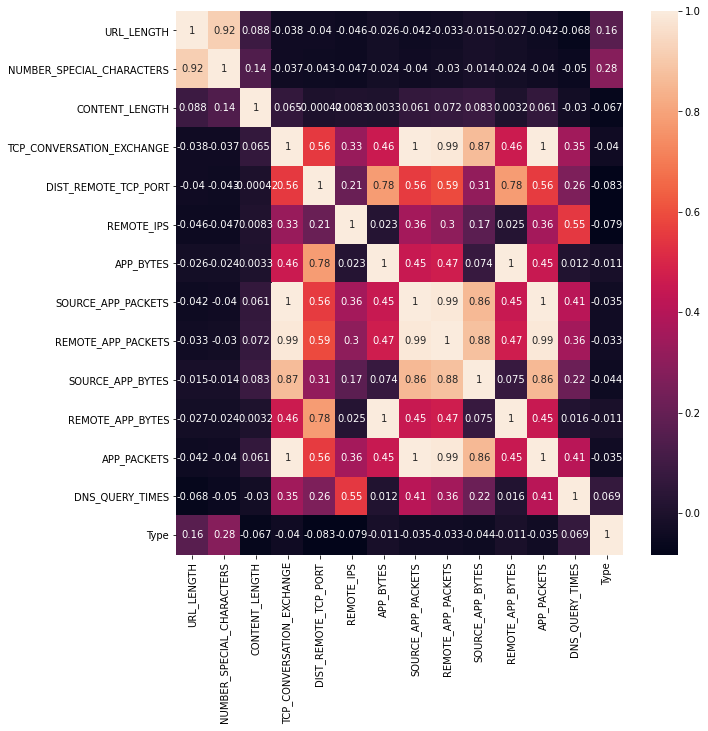

In [29]:
fig, ax = plt.subplots(figsize=(10,10))         

sns.heatmap(url_data.corr(), annot=True)

In [30]:
url_data['SERVER'].unique()


array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', 'None',
       'Apache/2', 'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips'

In [31]:
url_data['CHARSET'].unique()

array(['ISO-8859-1', 'UTF-8', 'US-ASCII', 'NONE', 'WINDOWS-1251',
       'ISO-8859', 'WINDOWS-1252'], dtype=object)

In [32]:
url_data['WHOIS_COUNTRY'].unique()

array(['NONE', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN',
       'LU', 'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'KY', 'AT',
       'CZ', 'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR', 'HK',
       'UA', 'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

### PREPROCESSING DATA (CONVERTING CATEGORICAL TO NUMERICAL DATA)


In [34]:
from sklearn.preprocessing import OneHotEncoder
ohe  = OneHotEncoder()

feature_array1 = ohe.fit_transform(url_data[['CHARSET']]).toarray()

feature_array1

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [35]:
ohe.categories_

[array(['ISO-8859', 'ISO-8859-1', 'NONE', 'US-ASCII', 'UTF-8',
        'WINDOWS-1251', 'WINDOWS-1252'], dtype=object)]

In [36]:
feature1_labels=ohe.categories_

In [37]:
np.array(feature1_labels).ravel()

array(['ISO-8859', 'ISO-8859-1', 'NONE', 'US-ASCII', 'UTF-8',
       'WINDOWS-1251', 'WINDOWS-1252'], dtype=object)

In [38]:
feature1_labels=np.array(feature1_labels).ravel()
print(feature1_labels)

['ISO-8859' 'ISO-8859-1' 'NONE' 'US-ASCII' 'UTF-8' 'WINDOWS-1251'
 'WINDOWS-1252']


In [39]:
charfeature=pd.DataFrame(feature_array1,columns=feature1_labels)
charfeature

,ISO-8859,ISO-8859-1,NONE,US-ASCII,UTF-8,WINDOWS-1251,WINDOWS-1252
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
1774,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1775,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1776,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1777,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [40]:
url_data.drop('CHARSET', axis=1, inplace=True)
url_data.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,Malicious
0,16,7,nginx,263.0,NONE,None,7,0,2,700,9,10,1153,832,9,2.0,1,Malicious
1,16,6,Apache/2.4.10,15087.0,NONE,None,17,7,4,1230,17,19,1265,1230,17,0.0,0,Non-Malicious
2,16,6,Microsoft-HTTPAPI/2.0,324.0,NONE,None,0,0,0,0,0,0,0,0,0,0.0,0,Non-Malicious
3,17,6,nginx,162.0,US,AK,31,22,3,3812,39,37,18784,4380,39,8.0,0,Non-Malicious
4,17,6,None,124140.0,US,TX,57,2,5,4278,61,62,129889,4586,61,4.0,0,Non-Malicious


In [41]:
url1= pd.concat([url_data, charfeature], axis=1, )
url1[0:5]

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,...,DNS_QUERY_TIMES,Type,Malicious,ISO-8859,ISO-8859-1,NONE,US-ASCII,UTF-8,WINDOWS-1251,WINDOWS-1252
0,16,7,nginx,263.0,NONE,None,7,0,2,700,...,2.0,1,Malicious,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,16,6,Apache/2.4.10,15087.0,NONE,None,17,7,4,1230,...,0.0,0,Non-Malicious,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,16,6,Microsoft-HTTPAPI/2.0,324.0,NONE,None,0,0,0,0,...,0.0,0,Non-Malicious,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,17,6,nginx,162.0,US,AK,31,22,3,3812,...,8.0,0,Non-Malicious,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,17,6,None,124140.0,US,TX,57,2,5,4278,...,4.0,0,Non-Malicious,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [42]:
ohe  = OneHotEncoder()

feature_array2 = ohe.fit_transform(url1[['SERVER']]).toarray()

feature_array2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
ohe.categories_

[array(['.V01 Apache', '294', 'ATS', 'ATS/5.3.0',
        'Aeria Games & Entertainment', 'AkamaiGHost', 'AmazonS3', 'Apache',
        'Apache-Coyote/1.1',
        'Apache/1.3.27 (Unix)  (Red-Hat/Linux) mod_perl/1.26 PHP/4.3.3 FrontPage/5.0.2 mod_ssl/2.8.12 OpenSSL/0.9.6b',
        'Apache/1.3.27 (Unix) PHP/4.4.1',
        'Apache/1.3.31 (Unix) PHP/4.3.9 mod_perl/1.29 rus/PL30.20',
        'Apache/1.3.33 (Unix) mod_ssl/2.8.24 OpenSSL/0.9.7e-p1 PHP/4.4.8',
        'Apache/1.3.34 (Unix) PHP/4.4.4',
        'Apache/1.3.37 (Unix) mod_perl/1.29 mod_ssl/2.8.28 OpenSSL/0.9.7e-p1',
        'Apache/1.3.39 (Unix) PHP/5.2.5 mod_auth_passthrough/1.8 mod_bwlimited/1.4 mod_log_bytes/1.2 mod_gzip/1.3.26.1a FrontPage/5.0.2.2635 DAV/1.0.3 mod_ssl/2.8.30 OpenSSL/0.9.7a',
        'Apache/1.3.42 Ben-SSL/1.60 (Unix) mod_gzip/1.3.26.1a mod_fastcgi/2.4.6 mod_throttle/3.1.2 Chili!Soft-ASP/3.6.2 FrontPage/5.0.2.2635 mod_perl/1.31 PHP/4.4.9',
        'Apache/2', 'Apache/2.0.52 (Red Hat)',
        'Apache/2.0.63 

In [44]:
feature2_labels=ohe.categories_

In [45]:
feature2_labels=np.array(feature2_labels).ravel()
print(feature2_labels)

['.V01 Apache' '294' 'ATS' 'ATS/5.3.0' 'Aeria Games & Entertainment'
 'AkamaiGHost' 'AmazonS3' 'Apache' 'Apache-Coyote/1.1'
 'Apache/1.3.27 (Unix)  (Red-Hat/Linux) mod_perl/1.26 PHP/4.3.3 FrontPage/5.0.2 mod_ssl/2.8.12 OpenSSL/0.9.6b'
 'Apache/1.3.27 (Unix) PHP/4.4.1'
 'Apache/1.3.31 (Unix) PHP/4.3.9 mod_perl/1.29 rus/PL30.20'
 'Apache/1.3.33 (Unix) mod_ssl/2.8.24 OpenSSL/0.9.7e-p1 PHP/4.4.8'
 'Apache/1.3.34 (Unix) PHP/4.4.4'
 'Apache/1.3.37 (Unix) mod_perl/1.29 mod_ssl/2.8.28 OpenSSL/0.9.7e-p1'
 'Apache/1.3.39 (Unix) PHP/5.2.5 mod_auth_passthrough/1.8 mod_bwlimited/1.4 mod_log_bytes/1.2 mod_gzip/1.3.26.1a FrontPage/5.0.2.2635 DAV/1.0.3 mod_ssl/2.8.30 OpenSSL/0.9.7a'
 'Apache/1.3.42 Ben-SSL/1.60 (Unix) mod_gzip/1.3.26.1a mod_fastcgi/2.4.6 mod_throttle/3.1.2 Chili!Soft-ASP/3.6.2 FrontPage/5.0.2.2635 mod_perl/1.31 PHP/4.4.9'
 'Apache/2' 'Apache/2.0.52 (Red Hat)'
 'Apache/2.0.63 (Unix) mod_ssl/2.0.63 OpenSSL/0.9.8e-fips-rhel5 mod_auth_passthrough/2.1 mod_bwlimited/1.4 PHP/5.3.6'
 'Apache/

In [46]:
serverfeature=pd.DataFrame(feature_array2,columns=feature2_labels)
serverfeature

,.V01 Apache,294,ATS,ATS/5.3.0,Aeria Games & Entertainment,AkamaiGHost,AmazonS3,Apache,Apache-Coyote/1.1,Apache/1.3.27 (Unix) (Red-Hat/Linux) mod_perl/1.26 PHP/4.3.3 FrontPage/5.0.2 mod_ssl/2.8.12 OpenSSL/0.9.6b,...,nginx/1.8.0,nginx/1.8.1,nginx/1.9.13,nxfps,openresty,openresty/1.11.2.1,openresty/1.11.2.2,squid/3.3.8,tsa_c,www.lexisnexis.com 9999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
url1.drop('SERVER', axis=1, inplace=True)
url1.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,...,DNS_QUERY_TIMES,Type,Malicious,ISO-8859,ISO-8859-1,NONE,US-ASCII,UTF-8,WINDOWS-1251,WINDOWS-1252
0,16,7,263.0,NONE,None,7,0,2,700,9,...,2.0,1,Malicious,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,16,6,15087.0,NONE,None,17,7,4,1230,17,...,0.0,0,Non-Malicious,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,16,6,324.0,NONE,None,0,0,0,0,0,...,0.0,0,Non-Malicious,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,17,6,162.0,US,AK,31,22,3,3812,39,...,8.0,0,Non-Malicious,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,17,6,124140.0,US,TX,57,2,5,4278,61,...,4.0,0,Non-Malicious,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [48]:
url2= pd.concat([url1, serverfeature], axis=1, )
url2[0:5]

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,...,nginx/1.8.0,nginx/1.8.1,nginx/1.9.13,nxfps,openresty,openresty/1.11.2.1,openresty/1.11.2.2,squid/3.3.8,tsa_c,www.lexisnexis.com 9999
0,16,7,263.0,NONE,None,7,0,2,700,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16,6,15087.0,NONE,None,17,7,4,1230,17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16,6,324.0,NONE,None,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17,6,162.0,US,AK,31,22,3,3812,39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,6,124140.0,US,TX,57,2,5,4278,61,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
ohe  = OneHotEncoder()

feature_array3 = ohe.fit_transform(url2[['WHOIS_COUNTRY']]).toarray()

feature_array3

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [50]:
ohe.categories_

[array(['AE', 'AT', 'AU', 'BE', 'BR', 'BS', 'BY', 'CA', 'CH', 'CN', 'CY',
        'CZ', 'DE', 'ES', 'FR', 'GB', 'HK', 'IE', 'IL', 'IN', 'IT', 'JP',
        'KG', 'KR', 'KY', 'LU', 'LV', 'NL', 'NO', 'NONE', 'PA', 'PH', 'PK',
        'RU', 'SC', 'SE', 'SI', 'TH', 'TR', 'UA', 'UG', 'UK', 'US', 'UY'],
       dtype=object)]

In [51]:
feature3_labels=ohe.categories_

In [52]:
feature3_labels=np.array(feature3_labels).ravel()
print(feature3_labels)

['AE' 'AT' 'AU' 'BE' 'BR' 'BS' 'BY' 'CA' 'CH' 'CN' 'CY' 'CZ' 'DE' 'ES'
 'FR' 'GB' 'HK' 'IE' 'IL' 'IN' 'IT' 'JP' 'KG' 'KR' 'KY' 'LU' 'LV' 'NL'
 'NO' 'NONE' 'PA' 'PH' 'PK' 'RU' 'SC' 'SE' 'SI' 'TH' 'TR' 'UA' 'UG' 'UK'
 'US' 'UY']


In [53]:
countryfeature=pd.DataFrame(feature_array3,columns=feature3_labels)
countryfeature

,AE,AT,AU,BE,BR,BS,BY,CA,CH,CN,...,SC,SE,SI,TH,TR,UA,UG,UK,US,UY
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [54]:
url2.drop('WHOIS_COUNTRY', axis=1, inplace=True)
url2.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,...,nginx/1.8.0,nginx/1.8.1,nginx/1.9.13,nxfps,openresty,openresty/1.11.2.1,openresty/1.11.2.2,squid/3.3.8,tsa_c,www.lexisnexis.com 9999
0,16,7,263.0,None,7,0,2,700,9,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16,6,15087.0,None,17,7,4,1230,17,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16,6,324.0,None,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17,6,162.0,AK,31,22,3,3812,39,37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,6,124140.0,TX,57,2,5,4278,61,62,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
url_final = pd.concat([url2, countryfeature], axis=1, )
url_final[0:5]

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,...,SC,SE,SI,TH,TR,UA,UG,UK,US,UY
0,16,7,263.0,None,7,0,2,700,9,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16,6,15087.0,None,17,7,4,1230,17,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16,6,324.0,None,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17,6,162.0,AK,31,22,3,3812,39,37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,17,6,124140.0,TX,57,2,5,4278,61,62,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [56]:

url1=url_final.drop('Malicious', axis =1)

In [57]:
url_ml=url1.drop('WHOIS_STATEPRO', axis =1)
url_ml

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SC,SE,SI,TH,TR,UA,UG,UK,US,UY
0,16,7,263.0,7,0,2,700,9,10,1153,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16,6,15087.0,17,7,4,1230,17,19,1265,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16,6,324.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17,6,162.0,31,22,3,3812,39,37,18784,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,17,6,124140.0,57,2,5,4278,61,62,129889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774,194,16,12055.6,0,0,0,0,0,3,186,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1775,198,17,12055.6,0,0,0,0,0,2,124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1776,201,34,8904.0,83,2,6,6631,87,89,132181,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1777,234,34,12055.6,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [58]:
url_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1779 entries, 0 to 1778
Columns: 304 entries, URL_LENGTH to UY
dtypes: float64(292), int64(12)
memory usage: 4.1 MB


In [92]:
#split data into x and y

x  =  url_ml.drop('Type', axis =1)
y  = url_ml['Type']

In [94]:
#split into train and test test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=200)

In [95]:
print(X_train.shape)
print(y_train.shape)

(1423, 303)
(1423,)


In [96]:
X_train[0:5]

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SC,SE,SI,TH,TR,UA,UG,UK,US,UY
1540,86,15,12055.6,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
45,24,6,12303.1,84,54,5,10490,96,106,106925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
870,49,10,20711.7,15,6,8,1122,15,11,702,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
780,47,11,13244.0,26,11,7,3213,34,32,16931,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1418,73,13,12055.6,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [97]:

from sklearn.linear_model import LogisticRegression


LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
print("Accuracy for LogisticRegression:", round(LogReg.score(X_train, y_train) * 100, 2))
print("Accuacy Score for LogisticRegression while Test:",round(LogReg.score(X_test, y_test)*100,2))

Accuracy for LogisticRegression: 88.4
Score for LogisticRegression: 86.52


### Support Vector Machines

In [98]:


from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(X_train, y_train)

print("Accuracy for SVC:", round(svc.score(X_train, y_train) * 100, 2))
print("Accuracy Score for SVC while Test:",round(svc.score(X_test, y_test)*100,2))


Accuracy for SVC: 88.4
Score for SVC: 85.67


#### # Random Forest Classifier

In [99]:

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

print("Accuracy for RandomForestClassifier:", round(random_forest.score(X_train, y_train) * 100, 2))
print("Accuracy Score for RandomForestClassifier while test:",round(random_forest.score(X_test, y_test)*100,2))

Accuracy for RandomForestClassifier: 100.0
Score for RandomForestClassifier: 95.51


### DecisionTreeClassifier

In [100]:
from sklearn import tree
#Build
decision_tree = tree.DecisionTreeClassifier(max_depth=5) 
#Train
decision_tree.fit(X_train, y_train)

#Make prediction
decision_tree.score(X_test,y_test)
Y_pred = decision_tree.predict(X_test)
print("Accuracy for DecisionTreeClassifier:", round(decision_tree.score(X_train, y_train) * 100, 2))
print("Accuracy Score for DecisionTreeClassifier :", round(decision_tree.score(X_test,y_test)* 100, 2))

Accuracy for DecisionTreeClassifier: 95.29
Score for DecisionTreeClassifier: 94.66


### Tune Decision Tree Classifier

In [101]:
decision_tree = tree.DecisionTreeClassifier(max_depth=50) 
decision_tree.fit(X_train, y_train)
print("Accuracy for DecisionTreeClassifier:", round(decision_tree.score(X_train, y_train) * 100, 2))
print("Tuned Score for DecisionTreeClassifier:", round(decision_tree.score(X_test,y_test)* 100, 2))

Accuracy for DecisionTreeClassifier: 100.0
Tuned Score for DecisionTreeClassifier: 93.82


### Build Gradient Boosting Classifier

In [102]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boost=GradientBoostingClassifier()
gradient_boost.fit(X_train, y_train)
print("Accuracy for GradientBoostingClassifier:", round(gradient_boost.score(X_train, y_train) * 100, 2))
print("Score for GradientBoostingClassifier:", round(gradient_boost.score(X_test,y_test)* 100, 2))

Accuracy for GradientBoostingClassifier: 98.45
Score for GradientBoostingClassifier: 95.79


#### K-nearest classifier

In [103]:
from sklearn.neighbors import KNeighborsClassifier

k_neighbors=KNeighborsClassifier(n_neighbors=3)
k_neighbors.fit(X_train, y_train)
print("Accuracy for KNeighborsClassifier:", round(k_neighbors.score(X_train, y_train) * 100, 2))
print("Score for KNeighborsClassifier:", round(k_neighbors.score(X_test,y_test)* 100, 2))

Accuracy for KNeighborsClassifier: 96.13
Score for KNeighborsClassifier: 91.29


In [104]:
Y_pred = decision_tree.predict(X_test)
from sklearn.metrics import confusion_matrix , precision_score ,recall_score,f1_score
print("recall:",round(recall_score(y_test , Y_pred)* 100, 2))
print("precision:",round(precision_score(y_test , Y_pred)* 100, 2))
print("Confusion matrix",confusion_matrix(y_test,Y_pred))

recall: 68.63
precision: 85.37
Confusion matrix [[299   6]
 [ 16  35]]


### Prediction Probabilities

In [116]:

random_forest_probs = random_forest.predict_proba(X_test)
decision_tree_probs = decision_tree.predict_proba(X_test)
k_neighbors_probs = k_neighbors.predict_proba(X_test)
svc_probs= svc.predict_proba(X_test)
LogReg_probs=LogReg.predict_proba(X_test)


## Probabilities for the positive outcome 

In [117]:
random_forest_probs= random_forest_probs[:,-1]
decision_tree_probs=decision_tree_probs[:,-1]
k_neighbors_probs= k_neighbors_probs[:,-1]
svc_probs=svc_probs[:,-1]
LogReg_probs=LogReg_probs[:,-1]

### AUROC Scores

In [118]:
from sklearn.metrics import roc_auc_score, roc_curve

random_forest_auc=roc_auc_score(y_test,random_forest_probs)
decision_tree_auc=roc_auc_score(y_test,decision_tree_probs)
k_neighbors_auc=roc_auc_score(y_test,k_neighbors_probs)
svc_auc=roc_auc_score(y_test,svc_probs)
LogReg_auc=roc_auc_score(y_test,LogReg_probs)

In [125]:
print("Random Forest : AUROC = %.3f" %(random_forest_auc))
print("Decision Tree : AUROC = %.3f" %(decision_tree_auc))
print("K Neighbors : AUROC = %.3f" %(k_neighbors_auc))
print("SVC : AUROC = %.3f" %(svc_auc))
print("Logistic Regression : AUROC = %.3f" %(LogReg_auc))

Random Forest : AUROC = 0.982
Decision Tree : AUROC = 0.833
K Neighbors : AUROC = 0.919
SVC : AUROC = 0.614
Logistic Regression : AUROC = 0.743


### Calculate ROC Curve

In [126]:
random_forest_fpr, random_forest_tpr,_ = roc_curve(y_test, random_forest_probs)
decision_tree_fpr, decision_tree_tpr,_ = roc_curve(y_test, decision_tree_probs)
k_neighbors_fpr, k_neighbors_tpr,_ = roc_curve(y_test, k_neighbors_probs)
svc_fpr, svc_tpr,_ = roc_curve(y_test, svc_probs)
LogReg_fpr, LogReg_tpr,_ = roc_curve(y_test, LogReg_probs)

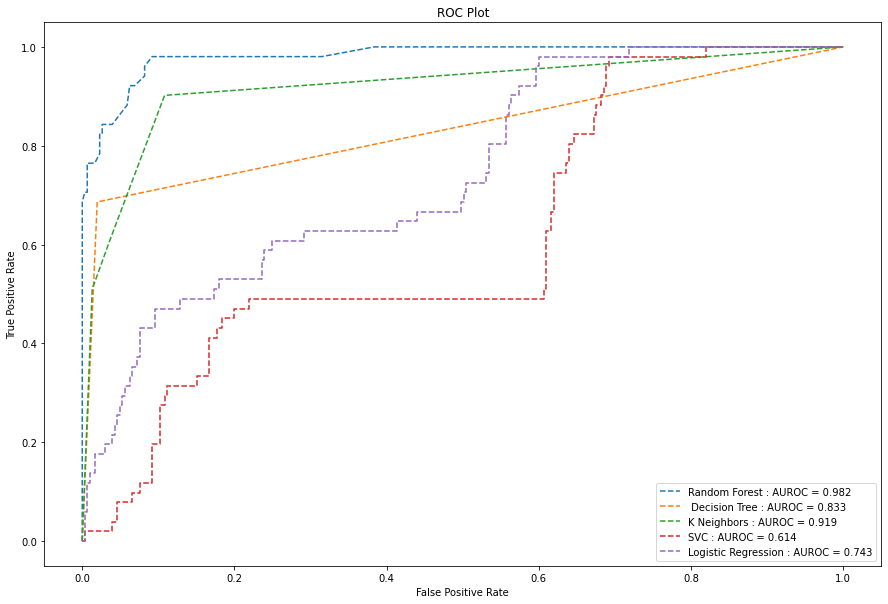

In [129]:
plt.figure(figsize=(15,10))
plt.plot(random_forest_fpr, random_forest_tpr,linestyle='--', label="Random Forest : AUROC = %.3f" %random_forest_auc)
plt.plot(decision_tree_fpr, decision_tree_tpr,linestyle='--', label=" Decision Tree : AUROC = %.3f" %decision_tree_auc)
plt.plot(k_neighbors_fpr, k_neighbors_tpr,linestyle='--', label="K Neighbors : AUROC = %.3f" %k_neighbors_auc)
plt.plot(svc_fpr, svc_tpr,linestyle='--', label="SVC : AUROC = %.3f" %svc_auc)
plt.plot(LogReg_fpr, LogReg_tpr,linestyle='--', label="Logistic Regression : AUROC = %.3f" %LogReg_auc)


plt.title('ROC Plot')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()